In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [28]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
submission = pd.read_csv('sample_submission.csv', index_col=0)

In [3]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [6]:
train.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

In [7]:
train.isnull().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

#### 'voted' >> 0,1

In [29]:
#voted = 0 , unvoted = 1 으로 바꿔주기
train.voted = train.voted - 1

#### - 문항 reverse

In [30]:
# -부호를 가진 문항들의 답변값을 reverse

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns:
    train[flip] = 6 - train[flip]
    test[flip] = 6 - test[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns:
    train[flip] = 6 - train[flip]
    test[flip] = 6 - test[flip]

#### 마키아벨리즘 스코어

In [33]:
answered_atts = [
    'QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
    'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA'
]

answered_time_atts = [
    'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 
    'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE','QqE', 'QrE', 'QsE', 'QtE'
]

In [34]:
# Mach_score
train['Mach_score'] = train[answered_atts].mean(axis=1)

In [35]:
test['Mach_score'] = test[answered_atts].mean(axis=1)

#### answer, time 변수 scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E83101948>,
      dtype=object)

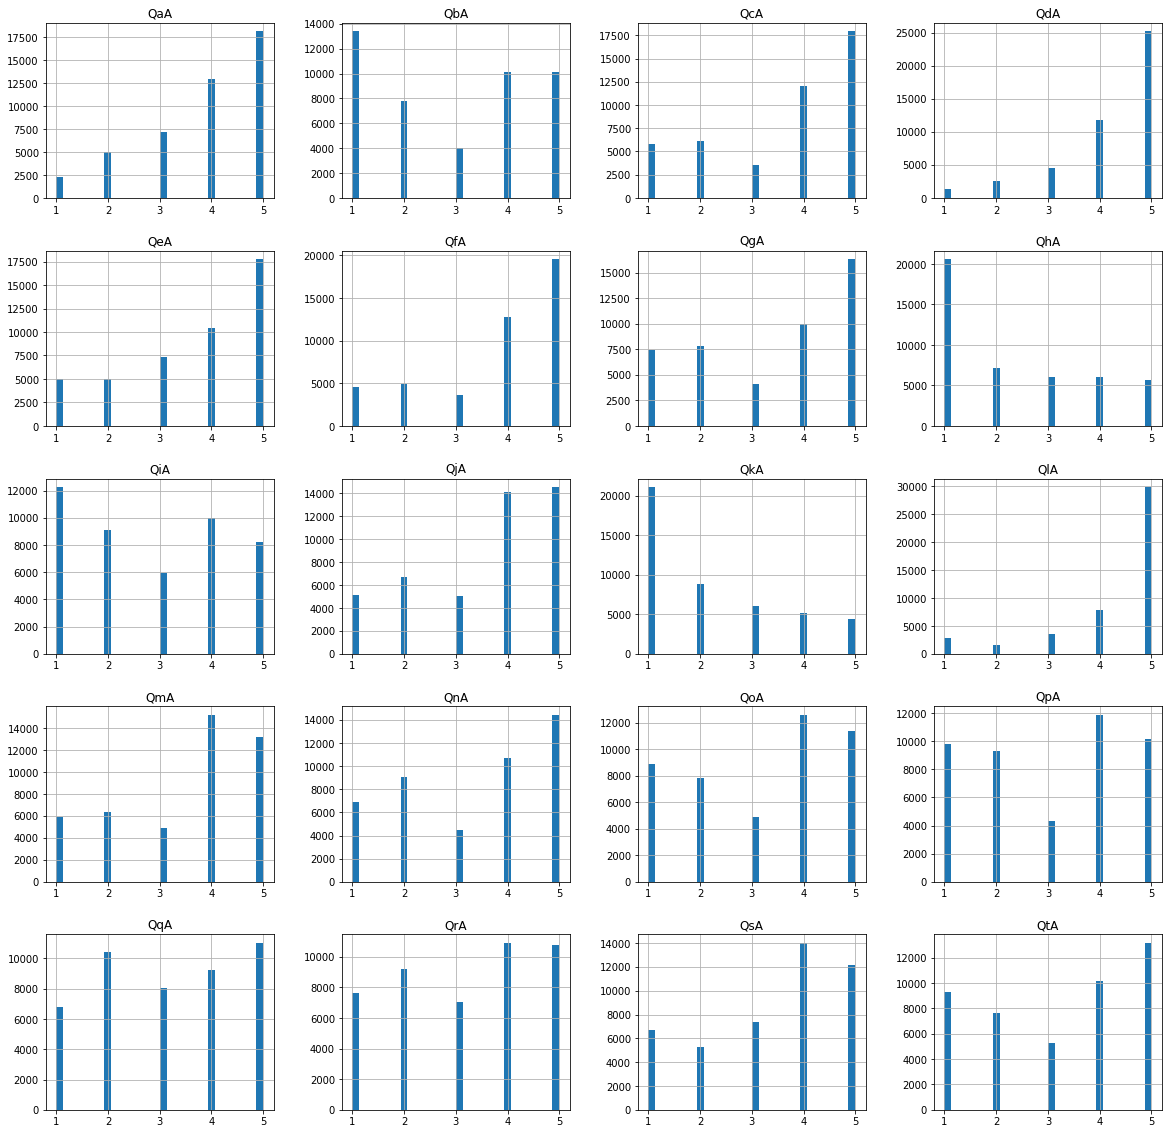

In [12]:
#문항별 응답 분포
train[answered_atts].hist(bins=30, figsize=(20, 20))

In [36]:
answered_atts = [
    'QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
    'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA', 
    'Mach_score'
]

answered_time_atts = [
    'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 
    'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE','QqE', 'QrE', 'QsE', 'QtE'
]

In [37]:
answer = train[answered_atts]
time = train[answered_time_atts]

time_drop = train[train.columns.difference(answered_time_atts)]
ans_drop = time_drop[time_drop.columns.difference(answered_atts)]

In [38]:
answer_t = test[answered_atts]
time_t = test[answered_time_atts]

time_drop_t = test[test.columns.difference(answered_time_atts)]
ans_drop_t = time_drop_t[time_drop_t.columns.difference(answered_atts)]

In [39]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stand_t = pd.DataFrame(scaler.fit_transform(time), columns=answered_time_atts)
stand_tt = pd.DataFrame(scaler.fit_transform(time_t), columns=answered_time_atts)

In [16]:
stand_t.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,0.000381,0.000388,0.001674,0.000943,0.000976,0.000155,0.001179,0.000043,0.000239,0.000260,0.000423,0.000048,0.000144,0.001541,0.001096,0.000351,0.000270,0.000077,0.000885,0.000192
std,0.005417,0.006005,0.010301,0.007034,0.008702,0.006468,0.009133,0.004688,0.006702,0.005461,0.006361,0.004725,0.005338,0.009676,0.008284,0.005591,0.005262,0.004694,0.005778,0.005824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000157,0.000152,0.000718,0.000421,0.000421,0.000041,0.000491,0.000010,0.000074,0.000091,0.000178,0.000010,0.000044,0.000664,0.000487,0.000152,0.000108,0.000024,0.000390,0.000061
50%,0.000220,0.000214,0.001003,0.000583,0.000588,0.000058,0.000699,0.000014,0.000106,0.000127,0.000244,0.000014,0.000062,0.000941,0.000674,0.000209,0.000152,0.000035,0.000561,0.000086
75%,0.000332,0.000325,0.001503,0.000856,0.000850,0.000090,0.001053,0.000020,0.000162,0.000192,0.000357,0.000021,0.000093,0.001427,0.000993,0.000303,0.000230,0.000052,0.000854,0.000130
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stand_a = pd.DataFrame(scaler.fit_transform(answer), columns=answered_atts)
stand_at = pd.DataFrame(scaler.fit_transform(answer_t), columns=answered_atts)

In [41]:
data = pd.concat([stand_a,stand_t,ans_drop],axis=1)
data_t = pd.concat([stand_at,stand_tt,ans_drop_t],axis=1)

#### familysize 이상치 제거

In [42]:
data = data[data['familysize'] < 50]
data_t = data_t[data_t['familysize'] < 50]

In [20]:
data

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA,Mach_score,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0.50,0.75,1.00,1.00,0.75,0.00,0.75,0.75,0.00,0.75,0.25,0.75,0.25,0.00,0.25,0.25,0.75,0.75,0.25,0.00,0.4875,0.000140,0.000241,0.001115,0.000643,0.000808,0.000044,0.000525,0.000010,0.000067,0.000130,0.000183,0.000011,0.000059,0.001304,0.000442,0.000199,0.000086,0.000027,0.000473,0.000094,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0.00,1.00,0.50,0.00,1.00,0.50,1.00,0.00,0.00,0.50,0.00,0.75,0.00,0.00,0.00,1.00,0.00,1.00,0.75,0.00,0.4000,0.000258,0.000231,0.003858,0.001895,0.002237,0.000184,0.000750,0.000038,0.000110,0.000128,0.000610,0.000050,0.000305,0.002972,0.000927,0.000519,0.000317,0.000095,0.003326,0.000114,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,0.25,0.00,0.00,0.25,0.00,1.00,0.25,0.00,0.50,0.25,0.00,1.00,0.25,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.2250,0.000662,0.000261,0.001143,0.002156,0.000681,0.000043,0.001069,0.000009,0.000156,0.000158,0.000207,0.000033,0.000063,0.003508,0.000996,0.000243,0.000219,0.000041,0.000890,0.000120,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,0.50,0.50,0.75,0.50,1.00,0.75,0.25,0.50,0.00,0.75,0.50,0.75,0.75,0.25,0.75,0.75,0.50,0.25,0.75,1.00,0.5875,0.000198,0.000410,0.001110,0.002073,0.000173,0.000127,0.000125,0.000021,0.000165,0.000566,0.000667,0.000016,0.000639,0.001963,0.000893,0.005132,0.000136,0.000279,0.001840,0.000111,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.00,0.00,1.00,0.75,1.00,0.75,1.00,0.00,0.00,1.00,0.00,1.00,0.75,0.75,0.00,0.75,0.00,0.00,0.00,0.25,0.5000,0.000374,0.000122,0.000609,0.000667,0.000515,0.000051,0.000904,0.000012,0.000068,0.000140,0.000153,0.000015,0.000037,0.000907,0.000576,0.000245,0.000076,0.000033,0.000434,0.000161,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.75,1.00,0.75,1.00,1.00,1.00,1.00,0.00,1.00,0.75,0.25,1.00,0.75,1.00,0.25,0.75,0.75,1.00,1.00,0.75,0.7875,0.000425,0.000106,0.000348,0.000167,0.000301,0.000021,0.000271,0.000005,0.000060,0.000028,0.000127,0.000002,0.000026,0.000452,0.001462,0.000094,0.000192,0.000009,0.000436,0.000193,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,0.75,0.50,0.75,1.00,0.50,0.75,0.75,0.00,0.75,1.00,0.75,1.00,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.7000,0.000230,0.000238,0.001307,0.000497,0.000862,0.000045,0.000576,0.000013,0.000264,0.000140,0.000514,0.000016,0.000058,0.002268,0.001164,0.000155,0.000176,0.000035,0.000489,0.000101,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,0.25,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.1250,0.000235,0.000149,0.001173,0.000959,0.000867,0.000104,0.001001,0.000012,0.000130,0.000178,0.000220,0.000019,0.000133,0.001427,0.000991,0.000258,0.000111,0.000056,0.001034,0.000056,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,1.00,0.50,0.75,0.75,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.75,0.50,0.00,0.00,0.25,0.25,0.75,0.00,0.4750,0.000299,0.000234,0.000995,0.000808,0.000679,0.000049,0.000585,0.000013,0.000103,0.000078,0.000212,0.000009,0.000295,0.0011

#### gender, race, religion 라벨링

In [43]:
from sklearn.preprocessing import LabelEncoder

#categorical feature 전처리
label = ['gender', 'race', 'religion', 'age_group']

le = LabelEncoder()

for i in label:
    data[i] = le.fit_transform(data[i])
    data_t[i] = le.fit_transform(data_t[i])
    
data.columns

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
       'Mach_score', 'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE',
       'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE',
       'QsE', 'QtE', 'age_group', 'education', 'engnat', 'familysize',
       'gender', 'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03',
       'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban',
       'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04',
       'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12',
       'wr_13'],
      dtype='object')

#### tp score

In [44]:
tp_col = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
         'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

In [45]:
tp = data[tp_col]
tp_drop = data[data.columns.difference(tp_col)]

tp_t = data_t[tp_col]
tp_drop_t = data_t[data_t.columns.difference(tp_col)]

In [46]:
tp = tp.replace(7, np.nan)
data = pd.concat([tp_drop,tp],axis=1)
data = data.fillna(data.mean().astype(int))

tp_t = tp_t.replace(7, np.nan)
data_t = pd.concat([tp_drop_t,tp_t],axis=1)
data_t = data_t.fillna(data_t.mean().astype(int))
data_t

,Mach_score,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,0.3625,0.50,0.004731,0.25,0.000541,0.50,0.000127,1.00,0.002443,0.75,0.001595,0.25,0.004085,0.00,0.002708,0.25,0.005503,0.25,0.000162,0.25,0.002680,0.00,0.000408,0.50,0.001027,0.50,0.009529,0.00,0.005599,0.50,0.000527,0.75,0.001121,0.50,0.000526,0.25,0.000121,0.00,0.003887,0.25,0.001211,1,2,2,3,1,1,1,6,6,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2.0,1.0,1.0,4.0,1.0,2.0,2.0,3.0,4.0,4.0
1,0.4500,0.50,0.003252,0.25,0.000357,0.50,0.000042,0.50,0.000401,0.25,0.000709,1.00,0.000779,0.75,0.000434,0.00,0.008788,0.00,0.000232,0.50,0.000524,0.00,0.000127,1.00,0.000558,0.50,0.012516,1.00,0.002477,0.25,0.000450,0.50,0.000779,0.25,0.000241,0.00,0.000114,0.50,0.000683,0.75,0.000517,1,2,2,2,1,2,1,5,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,4.0
2,0.6375,0.50,0.003158,0.25,0.000460,0.75,0.000012,0.75,0.000297,0.75,0.000821,0.75,0.000988,1.00,0.000583,0.00,0.004810,0.75,0.000341,0.75,0.000224,0.25,0.000327,1.00,0.000458,0.75,0.001571,0.75,0.002705,1.00,0.000301,0.50,0.001888,0.50,0.000466,0.25,0.000327,0.50,0.001227,1.00,0.000795,3,3,2,7,1,1,2,5,5,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,6.0,2.0,3.0,0.0,6.0,1.0,2.0,2.0,4.0,1.0
3,0.5875,1.00,0.004284,0.00,0.000190,1.00,0.000039,0.75,0.001125,0.00,0.001585,1.00,0.000745,1.00,0.000540,0.00,0.010722,1.00,0.000140,0.00,0.000413,0.50,0.000483,1.00,0.000341,0.75,0.001585,1.00,0.001795,0.25,0.000491,0.75,0.001120,0.00,0.000710,1.00,0.000097,0.75,0.001245,0.00,0.000922,6,4,1,4,1,1,2,6,3,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,5.0,1.0,6.0,0.0,6.0,0.0,5.0,1.0,6.0
4,0.4750,0.75,0.003152,0.00,0.000226,1.00,0.000023,0.75,0.000829,0.75,0.000567,0.75,0.000532,0.00,0.000252,0.00,0.003633,0.75,0.000145,0.50,0.000323,0.00,0.000201,0.75,0.000630,0.25,0.002608,0.25,0.002088,0.25,0.000356,0.75,0.000458,0.50,0.000343,0.25,0.000109,0.75,0.000564,0.50,0.001458,1,2,1,3,1,1,1,6,0,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,6.0,1.0,2.0,2.0,3.0,0.0,5.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,0.5500,0.00,0.002672,1.00,0.000193,1.00,0.000015,1.00,0.000269,0.75,0.000684,0.75,0.000564,0.25,0.000265,0.00,0.005961,0.50,0.000147,0.75,0.000562,0.25,0.000141,1.00,0.000430,0.25,0.001455,0.50,0.001652,0.75,0.000370,0.25,0.000560,0.25,0.000546,0.75,0.000121,0.25,0.000579,0.75,0.000432,2,3,2,3,0,1,1,5,3,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1.0,0.0,0.0,3.0,0.0,4.0,1.0,0.0,4.0,5.0
11379,0.8875,1.00,0.001919,1.00,0.000098,1.00,0.000006,1.00,0.000470,0.75,0.000724,1.00,0.000533,1.00,0.000461,0.00,0.006088,1.00,0.000079,1.00,0.000361,1.00,0.000089,1.00,0.000307,1.00,0.001012,1.00,0.001215,0.75,0.000242,1.00,0.000377,0.50,0.000360,1.00,0.000067,1.00,0.000319,0.75,0.000528,1,2,2,1,0,1,1,1,0,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,6.0,4.0
11380,0.5375,1.00,0.004005,0.25,0.000143,0.00,0.000020,0.75,0.000554,1.00,0.000506,0.75,0.000477,0.75,0.000304,0.75,0.006013,0.25,0.000086,0.25,0.000431,0.25,0.000117,0.75,0.000685,0.25,0.001604,0.75,0.002375,0.25,0.000293,0.25,0.000470,0.75,0.000424,0.75,0.000081,0.75,0.000364,0.25,0.000869,3,4,1,4,1,1,2,6,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,4.0,2.0,1.0,6.0,1.0,2.0,1.0,6.0,0.0,5.0
11381,0.5125,0.75,0.003418,0.00,0.000383,0.25,0.000127,1.00,0.000326,0.75,0.000732,1.00,0.000676,0.25,0.001085,0.00,0.005462,1.00,0.000112,0.25,0.000259,0.50,0.000367,1.00,0.000334,0.00,0.007233,1.00,0.003929,0.50,0.003737,0.00,0.00

In [47]:
# tipi 성격 구분 5 칼럼 추가
data[tp_col] = 7 - data[tp_col]

data['tp_ex'] = (data['tp01'] + 7 - (data['tp06'])) / 2
data['tp_ag'] = (7 - (data['tp02']) + data['tp07']) / 2
data['tp_co'] = (data['tp03'] + 7 - (data['tp08'])) / 2
data['tp_em'] = (7 - (data['tp04']) + data['tp09']) / 2
data['tp_op'] = (data['tp05'] + 7 - (data['tp10'])) / 2

# tipi 성격 구분 5 칼럼 추가
data_t[tp_col] = 7 - data_t[tp_col]

data_t['tp_ex'] = (data_t['tp01'] + 7 - (data_t['tp06'])) / 2
data_t['tp_ag'] = (7 - (data_t['tp02']) + data_t['tp07']) / 2
data_t['tp_co'] = (data_t['tp03'] + 7 - (data_t['tp08'])) / 2
data_t['tp_em'] = (7 - (data_t['tp04']) + data_t['tp09']) / 2
data_t['tp_op'] = (data_t['tp05'] + 7 - (data_t['tp10'])) / 2

In [48]:
data

,Mach_score,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,tp_ex,tp_ag,tp_co,tp_em,tp_op
0,0.4875,0.50,0.000140,0.75,0.000241,1.00,0.001115,1.00,0.000643,0.75,0.000808,0.00,0.000044,0.75,0.000525,0.75,0.000010,0.00,0.000067,0.75,0.000130,0.25,0.000183,0.75,0.000011,0.25,0.000059,0.00,0.001304,0.25,0.000442,0.25,0.000199,0.75,0.000086,0.75,0.000027,0.25,0.000473,0.00,0.000094,3,2,1,4,0,1,3,6,10,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,5.0,5.0,5.0,6.0,5.0,6.0,6.0,3.0,3.0,4.0,3.0,4.0,4.5,2.0,4.0
1,0.4000,0.00,0.000258,1.00,0.000231,0.50,0.003858,0.00,0.001895,1.00,0.002237,0.50,0.000184,1.00,0.000750,0.00,0.000038,0.00,0.000110,0.50,0.000128,0.00,0.000610,0.75,0.000050,0.00,0.000305,0.00,0.002972,0.00,0.000927,1.00,0.000519,0.00,0.000317,1.00,0.000095,0.75,0.003326,0.00,0.000114,2,4,2,3,0,1,1,1,7,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,6.0,6.0,7.0,7.0,6.0,5.0,4.0,3.0,7.0,3.0,4.0,2.5,5.5,3.5,5.0
2,0.2250,0.25,0.000662,0.00,0.000261,0.00,0.001143,0.25,0.002156,0.00,0.000681,1.00,0.000043,0.25,0.001069,0.00,0.000009,0.50,0.000156,0.25,0.000158,0.00,0.000207,1.00,0.000033,0.25,0.000063,0.25,0.003508,0.25,0.000996,0.00,0.000243,0.00,0.000219,0.25,0.000041,0.00,0.000890,0.00,0.000120,3,3,1,3,1,1,2,6,10,2,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,5.0,4.0,6.0,2.0,4.0,3.0,5.0,1.0,6.0,4.0,4.5,4.0,6.0,5.5,3.5
3,0.5875,0.50,0.000198,0.50,0.000410,0.75,0.001110,0.50,0.002073,1.00,0.000173,0.75,0.000127,0.25,0.000125,0.50,0.000021,0.00,0.000165,0.75,0.000566,0.50,0.000667,0.75,0.000016,0.75,0.000639,0.25,0.001963,0.75,0.000893,0.75,0.005132,0.50,0.000136,0.25,0.000279,0.75,0.001840,1.00,0.000111,2,4,2,0,0,1,1,1,7,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,5.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,6.0,4.0,4.0,5.0,4.5,3.5,4.5
4,0.5000,1.00,0.000374,0.00,0.000122,1.00,0.000609,0.75,0.000667,1.00,0.000515,0.75,0.000051,1.00,0.000904,0.00,0.000012,0.00,0.000068,1.00,0.000140,0.00,0.000153,1.00,0.000015,0.75,0.000037,0.75,0.000907,0.00,0.000576,0.75,0.000245,0.00,0.000076,0.00,0.000033,0.00,0.000434,0.25,0.000161,2,3,1,2,1,1,2,6,0,1,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,6.0,6.0,6.0,1.0,7.0,5.0,7.0,1.0,5.0,1.0,4.0,4.0,6.0,5.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,0.7875,0.75,0.000425,1.00,0.000106,0.75,0.000348,1.00,0.000167,1.00,0.000301,1.00,0.000021,1.00,0.000271,0.00,0.000005,1.00,0.000060,0.75,0.000028,0.25,0.000127,1.00,0.000002,0.75,0.000026,1.00,0.000452,0.25,0.001462,0.75,0.000094,0.75,0.000192,1.00,0.000009,1.00,0.000436,0.75,0.000193,1,2,1,1,0,3,1,6,8,3,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,6.0,5.0,1.0,6.0,5.0,1.0,4.0,7.0,1.0,3.0,6.0,3.0,0.5,1.0,4.5
45528,0.7000,0.75,0.000230,0.50,0.000238,0.75,0.001307,1.00,0.000497,0.50,0.000862,0.75,0.000045,0.75,0.000576,0.00,0.000013,0.75,0.000264,1.00,0.000140,0.75,0.000514,1.00,0.000016,0.50,0.000058,0.75,0.002268,0.75,0.001164,0.75,0.000155,0.75,0.000176,0.50,0.000035,0.75,0.000489,0.75,0.000101,3,2,1,2,1,1,1,6,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,5.0,5.0,5.0,4.0,6.0,4.0,4.0,3.0,6.0,2.0,4.0,3.0,4.5,4.5,5.5
45529,0.1250,0.25,0.000235,0.00,0.000149,0.00,0.001173,0.25,0.000959,0.00,0.000867,0.25,0.000104,0.00,0.001001,0.00,0.000012,0.00,0.000130,0.00,0.000178,0.00,0.000220,1.00,0.000019,0.00,0.000133,0.25,0.001427,0.00,0.000991,0.00,0.000258,0.00,0.000111,0.00,0.000056,0.50,0.001034,0.00,0.000056,1,2,1,1,0,1,1,6,5,2,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,3.0,3.0,5.0,3.0,7.0,6.0,7.0,5.0,6.0,1.0,2.0,5.5,3.5,5.

In [49]:
data_t

,Mach_score,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,tp_ex,tp_ag,tp_co,tp_em,tp_op
0,0.3625,0.50,0.004731,0.25,0.000541,0.50,0.000127,1.00,0.002443,0.75,0.001595,0.25,0.004085,0.00,0.002708,0.25,0.005503,0.25,0.000162,0.25,0.002680,0.00,0.000408,0.50,0.001027,0.50,0.009529,0.00,0.005599,0.50,0.000527,0.75,0.001121,0.50,0.000526,0.25,0.000121,0.00,0.003887,0.25,0.001211,1,2,2,3,1,1,1,6,6,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,5.0,6.0,6.0,3.0,6.0,5.0,5.0,4.0,3.0,3.0,3.5,3.0,4.5,3.5,5.0
1,0.4500,0.50,0.003252,0.25,0.000357,0.50,0.000042,0.50,0.000401,0.25,0.000709,1.00,0.000779,0.75,0.000434,0.00,0.008788,0.00,0.000232,0.50,0.000524,0.00,0.000127,1.00,0.000558,0.50,0.012516,1.00,0.002477,0.25,0.000450,0.50,0.000779,0.25,0.000241,0.00,0.000114,0.50,0.000683,0.75,0.000517,1,2,2,2,1,2,1,5,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,5.0,3.0,3.5,3.5,4.5,3.5,5.0
2,0.6375,0.50,0.003158,0.25,0.000460,0.75,0.000012,0.75,0.000297,0.75,0.000821,0.75,0.000988,1.00,0.000583,0.00,0.004810,0.75,0.000341,0.75,0.000224,0.25,0.000327,1.00,0.000458,0.75,0.001571,0.75,0.002705,1.00,0.000301,0.50,0.001888,0.50,0.000466,0.25,0.000327,0.50,0.001227,1.00,0.000795,3,3,2,7,1,1,2,5,5,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1.0,5.0,4.0,7.0,1.0,6.0,5.0,5.0,3.0,6.0,1.0,3.5,3.0,1.5,1.0
3,0.5875,1.00,0.004284,0.00,0.000190,1.00,0.000039,0.75,0.001125,0.00,0.001585,1.00,0.000745,1.00,0.000540,0.00,0.010722,1.00,0.000140,0.00,0.000413,0.50,0.000483,1.00,0.000341,0.75,0.001585,1.00,0.001795,0.25,0.000491,0.75,0.001120,0.00,0.000710,1.00,0.000097,0.75,0.001245,0.00,0.000922,6,4,1,4,1,1,2,6,3,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,7.0,2.0,6.0,1.0,7.0,1.0,7.0,2.0,6.0,1.0,6.5,6.0,5.5,6.0,6.5
4,0.4750,0.75,0.003152,0.00,0.000226,1.00,0.000023,0.75,0.000829,0.75,0.000567,0.75,0.000532,0.00,0.000252,0.00,0.003633,0.75,0.000145,0.50,0.000323,0.00,0.000201,0.75,0.000630,0.25,0.002608,0.25,0.002088,0.25,0.000356,0.75,0.000458,0.50,0.000343,0.25,0.000109,0.75,0.000564,0.50,0.001458,1,2,1,3,1,1,1,6,0,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1.0,6.0,5.0,5.0,4.0,7.0,2.0,5.0,3.0,4.0,0.5,1.5,3.5,2.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,0.5500,0.00,0.002672,1.00,0.000193,1.00,0.000015,1.00,0.000269,0.75,0.000684,0.75,0.000564,0.25,0.000265,0.00,0.005961,0.50,0.000147,0.75,0.000562,0.25,0.000141,1.00,0.000430,0.25,0.001455,0.50,0.001652,0.75,0.000370,0.25,0.000560,0.25,0.000546,0.75,0.000121,0.25,0.000579,0.75,0.000432,2,3,2,3,0,1,1,5,3,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,6.0,7.0,7.0,4.0,7.0,3.0,6.0,7.0,3.0,2.0,5.0,3.0,3.5,3.0,6.0
11379,0.8875,1.00,0.001919,1.00,0.000098,1.00,0.000006,1.00,0.000470,0.75,0.000724,1.00,0.000533,1.00,0.000461,0.00,0.006088,1.00,0.000079,1.00,0.000361,1.00,0.000089,1.00,0.000307,1.00,0.001012,1.00,0.001215,0.75,0.000242,1.00,0.000377,0.50,0.000360,1.00,0.000067,1.00,0.000319,0.75,0.000528,1,2,2,1,0,1,1,1,0,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5.0,7.0,5.0,7.0,7.0,1.0,7.0,7.0,1.0,3.0,5.5,3.5,2.5,0.5,5.5
11380,0.5375,1.00,0.004005,0.25,0.000143,0.00,0.000020,0.75,0.000554,1.00,0.000506,0.75,0.000477,0.75,0.000304,0.75,0.006013,0.25,0.000086,0.25,0.000431,0.25,0.000117,0.75,0.000685,0.25,0.001604,0.75,0.002375,0.25,0.000293,0.25,0.000470,0.75,0.000424,0.75,0.000081,0.75,0.000364,0.25,0.000869,3,4,1,4,1,1,2,6,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,3.0,5.0,6.0,1.0,6.0,5.0,6.0,1.0,7.0,2.0,2.5,4.0,6.0,6.5,5.5
11381,0.5125,0.75,0.00

In [50]:
data.to_csv('train_label.csv', sep=',', na_rep='NaN', index = False)
data_t.to_csv('test_label.csv', sep=',', na_rep='NaN', index = False)

---